### Q1:  

1.  You are required  to make a user-agent that will crawl the WWW (your familiar domain)  to produce dataset of a particular website. 
    -	 the web site can be as simple as a list of webpages and what other pages they
link to
    -	the output does not need to be in XHTML (or HTML) form a multi-stage approach (e.g. produce the xhtml or html  in csv format  )        





In [14]:
#import libraries
import pandas as pd
transaction=pd.read_csv("Transactions.csv",header=0,index_col=0)
product=pd.read_csv("prod_cat_info.csv")
customer=pd.read_csv("Customer.csv",header=0,index_col=0)

In [15]:
#data preprossing
transaction.head()

,transaction_id,customer_id,transaction_date,prod_cat_code,prod_subcat_code,Quantity,Price,Tax,Total_amount,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [16]:
product.head(100)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [17]:
customer.head()

,customer_id,DOB,Gender,City_id,City
0,268408,02-01-1970,M,4.0,Tianjin
1,269696,07-01-1970,F,8.0,Chaohu
2,268159,08-01-1970,F,8.0,Chaohu
3,270181,10-01-1970,F,2.0,Chongqing
4,268073,11-01-1970,M,1.0,Beijing


### Q2:  

2.  Draw snowflake schema diagram for the above dataset. Justify your attributes to be selected in the respective dimensions.

The snowflake schema should meet the three requirements


- 1 build fact table surrended by dimension  tables

- 2 reduce data redundancy

- 3 Normalized data sturcture

We will draw the the entity relationship diagram to represent the snowflake schema

In [18]:
transaction.columns

Index(['transaction_id', 'customer_id', 'transaction_date', 'prod_cat_code',
       'prod_subcat_code', 'Quantity', 'Price', 'Tax', 'Total_amount',
       'Store_type'],
      dtype='object')

In [19]:
customer.columns

Index(['customer_id', 'DOB', 'Gender', 'City_id', 'City'], dtype='object')

In [20]:
product.columns

Index(['prod_cat_code', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat'], dtype='object')

In [21]:
#draw the fact table
Fact_Transaction=transaction[["transaction_id","cust_id","tran_date"]]
Fact_Transaction.head(3)

KeyError: "['tran_date', 'cust_id'] not in index"

<img src="https://tva1.sinaimg.cn/large/007S8ZIlgy1gg4e50cbv8j30jo096403.jpg" width="300" height="500" align="bottom" />

In [232]:
#draw customer dim table

Dim_Customer=customer[["customer_Id","DOB","Gender","city_code"]]
Dim_Customer.head(3)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0


<img src="https://tva1.sinaimg.cn/large/007S8ZIlgy1gg4eefh7btj30bo06eq3c.jpg" width="300" height="500" align="bottom" />

In [233]:
#draw city dim table

Dim_City=customer[["city_code"]]
Dim_City.head(3)

,city_code
0,4.0
1,8.0
2,8.0


<img src="https://tva1.sinaimg.cn/large/007S8ZIlgy1gg4egxzwqaj30b604uaa9.jpg" width="300" height="500" align="bottom" />

### Q3:  

3.   You are required to write code to  create a decision tree (DT) model using the above dataset (Question 1). In order to achieve the task, you are going to cover the following steps:

    - Importing required libraries
    - Loading Data
    - Feature Selection
    - Splitting Data
    - Building Decision Tree Model
    - Evaluating Model
    - Visualizing Decision Trees


In [30]:
# before we do that, we need merge the there data sets 
# first step we will merge Transactions and Customer datasets and drop the duplicated value

df = pd.merge(left = customer, right = transaction, left_on = 'customer_id', right_on = 'customer_id')



In [31]:
df.head()

,customer_id,DOB,Gender,City_id,City,transaction_id,transaction_date,prod_cat_code,prod_subcat_code,Quantity,Price,Tax,Total_amount,Store_type
0,268408,02-01-1970,M,4.0,Tianjin,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,Tianjin,16197868036,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,Tianjin,16197868036,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,Tianjin,28810141075,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop
4,268408,02-01-1970,M,4.0,Tianjin,64633435931,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store


In [ ]:
df.

In [40]:
len(df)

23053

In [39]:
df.customer_id.value_counts()

268819    13
269449    13
269245    12
268663    12
274227    12
266794    12
272286    12
275252    12
270831    12
272415    12
273014    12
270462    11
273515    11
267014    11
273708    11
270908    11
271862    11
274948    11
273896    11
272741    11
267913    11
273481    11
271797    11
267768    11
275131    11
268934    11
270535    11
272475    11
272526    11
268408    11
          ..
273265     1
274666     1
274692     1
268797     1
267078     1
273442     1
271411     1
267333     1
269642     1
271475     1
273538     1
273169     1
275061     1
266982     1
273634     1
271072     1
269556     1
274600     1
272539     1
268365     1
272459     1
270680     1
266897     1
267525     1
268594     1
268960     1
268433     1
268687     1
271008     1
268291     1
Name: customer_id, Length: 5506, dtype: int64

In [25]:

# df.duplicated().sum()
# df.drop_duplicates(inplace = True)

In [34]:
# seond step we will merge the df and products datasets

df_new = pd.merge(df,product,
                  left_on = ('prod_subcat_code', "prod_cat_code"),
                  right_on = ('prod_sub_cat_code', "prod_cat_code")).drop('prod_sub_cat_code', axis =1)

In [35]:
len(df_new)

5959

In [36]:
df_new.head()

,customer_id,DOB,Gender,City_id,City,transaction_id,transaction_date,prod_cat_code,prod_subcat_code,Quantity,Price,Tax,Total_amount,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,Tianjin,16197868036,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,Clothing,Mens
1,268408,02-01-1970,M,4.0,Tianjin,16197868036,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,Clothing,Mens
2,268159,08-01-1970,F,8.0,Chaohu,86038271893,30-01-2013,1,4,1,705,74.025,779.025,e-Shop,Clothing,Mens
3,270829,22-01-1970,F,8.0,Chaohu,22079731721,10/8/2012,1,4,1,1182,124.110,1306.110,TeleShop,Clothing,Mens
4,274630,01-02-1970,M,4.0,Tianjin,16857641351,5/12/2013,1,4,2,269,56.490,594.490,MBR,Clothing,Mens


In [37]:
df.customer_id.value_counts()

268819    13
269449    13
269245    12
268663    12
274227    12
266794    12
272286    12
275252    12
270831    12
272415    12
273014    12
270462    11
273515    11
267014    11
273708    11
270908    11
271862    11
274948    11
273896    11
272741    11
267913    11
273481    11
271797    11
267768    11
275131    11
268934    11
270535    11
272475    11
272526    11
268408    11
          ..
273265     1
274666     1
274692     1
268797     1
267078     1
273442     1
271411     1
267333     1
269642     1
271475     1
273538     1
273169     1
275061     1
266982     1
273634     1
271072     1
269556     1
274600     1
272539     1
268365     1
272459     1
270680     1
266897     1
267525     1
268594     1
268960     1
268433     1
268687     1
271008     1
268291     1
Name: customer_id, Length: 5506, dtype: int64

In [28]:
df_new.head()

,DOB,Gender,City_id,City,transaction_id,transaction_date,prod_cat_code,prod_subcat_code,Quantity,Price,Tax,Total_amount,Store_type,prod_cat,prod_subcat
0,02-01-1970,M,4.0,Tianjin,16197868036,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,Clothing,Mens
1,02-01-1970,M,4.0,Tianjin,16197868036,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,Clothing,Mens
2,08-01-1970,F,8.0,Chaohu,86038271893,30-01-2013,1,4,1,705,74.025,779.025,e-Shop,Clothing,Mens
3,22-01-1970,F,8.0,Chaohu,22079731721,10/8/2012,1,4,1,1182,124.110,1306.110,TeleShop,Clothing,Mens
4,01-02-1970,M,4.0,Tianjin,16857641351,5/12/2013,1,4,2,269,56.490,594.490,MBR,Clothing,Mens


In [267]:
# df_new.Gender=df_new.Gender.replace({"M":0,"F":1})

In [268]:
#calculate age through tran_date and DOB

df_new['tran_date'] = pd.to_datetime(df_new['tran_date'], errors='coerce')
df_new.insert(loc=3, column='Tran_year', value= df_new.tran_date.dt.year)


df_new['DOB'] = pd.to_datetime(df_new['DOB'], errors='coerce')
df_new.insert(loc=4, column='Birth_year', value= df_new.DOB.dt.year)

In [269]:
df_new['Tran_year']=df_new['Tran_year'].astype(int)
df_new['Birth_year']=df_new['Birth_year'].astype(int)

In [270]:
df_new["age"]=df_new['Tran_year'] -df_new['Birth_year']

In [271]:
df_new.head()

,customer_Id,DOB,Gender,Tran_year,Birth_year,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,age
0,268408,1970-02-01,0.0,2014,1970,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,44
1,275152,1970-01-16,0.0,2011,1970,4.0,73109425404,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,41
2,275034,1970-01-18,1.0,2011,1970,4.0,64777271023,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,41
3,270829,1970-01-22,1.0,2013,1970,8.0,87174343938,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,43
4,267657,1970-01-29,1.0,2013,1970,7.0,76242744953,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,43


In [272]:
df_new.prod_cat.value_counts()

Books               6066
Electronics         4895
Home and kitchen    4126
Footwear            2996
Clothing            2960
Bags                1997
Name: prod_cat, dtype: int64

In [273]:
df_new.age.value_counts().sort_index()

19     338
20     595
21     959
22     950
23    1047
24    1079
25    1053
26    1011
27     976
28     945
29     944
30     938
31     994
32    1054
33    1062
34     966
35    1013
36    1024
37    1066
38    1001
39     989
40    1000
41     970
42     668
43     352
44      46
Name: age, dtype: int64

In [274]:
df_new["age_categeory"] = df_new["age"]

In [43]:
df_new["age_categeory"]=df_new["age_category"].apply(lambda x: "young aduld" if x<=30 else "adult")

KeyError: 'age_category'

In [42]:
# DF=df_new.groupby(['customer_Id']).total_amt.sum()

# DF2=df_new.groupby(['customer_Id']).age.mean()


DF3=df_new.groupby(['customer_Id']).Gender.unique()

KeyError: 'customer_Id'

In [277]:
df_new.age_categeory.value_counts()

adult          17019
young aduld     6021
Name: age_categeory, dtype: int64

In [278]:
df_new[df_new.customer_Id==266783].total_amt.sum()

3113.89

In [279]:
# df_new["Gold_member"]= df["total_amt"]>500
# df_new.Gold_member.value_counts()

In [280]:
# select attibutes:

# X:age, gender,prod_subcat_code,prod_cat_code,Qty, Rate,Tax  Y:total_amt

In [281]:
# df_new=df_new.dropna()
# len(df_new)
# df_new=df_new.dropna()

In [282]:
# df_new.head()
df_new=df_new.dropna()
df_new.age_categeory.value_counts()


adult          17002
young aduld     6021
Name: age_categeory, dtype: int64

In [283]:
df_new.head()

,customer_Id,DOB,Gender,Tran_year,Birth_year,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,age,age_categeory
0,268408,1970-02-01,0.0,2014,1970,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,44,adult
1,275152,1970-01-16,0.0,2011,1970,4.0,73109425404,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,41,adult
2,275034,1970-01-18,1.0,2011,1970,4.0,64777271023,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,41,adult
3,270829,1970-01-22,1.0,2013,1970,8.0,87174343938,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,43,adult
4,267657,1970-01-29,1.0,2013,1970,7.0,76242744953,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,43,adult


In [284]:
df_new.city_code=df_new.city_code.astype(object)

In [285]:
Y=df_new.age_categeory


X=df_new.loc[:,["Gender","city_code","prod_subcat","Store_type"]]

# X=df_new.drop(['customer_Id',"DOB","Tran_year","Birth_year","transaction_id","tran_date","prod_subcat_code","prod_cat_code","age","age_categeory","Qty","Rate","Tax","total_amt"],axis=1)


In [286]:
Y.head()

0    adult
1    adult
2    adult
3    adult
4    adult
Name: age_categeory, dtype: object

In [287]:
X= pd.get_dummies(X)
Y= pd.get_dummies(Y)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=4)

In [288]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=4)

decisiontree = decision_tree.fit(X_train,y_train)

y_pred=decisiontree.predict(X_test)

In [289]:
print("performance of train:accuracy:",decisiontree.score(X_train, y_train))

performance of train:accuracy: 0.7323813660549463


In [290]:
print("performance of test:accuracy:",decisiontree.score(X_test, y_test))

performance of test:accuracy: 0.705971769815418


In [291]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83      3382
           1       0.34      0.04      0.07      1223

   micro avg       0.73      0.71      0.72      4605
   macro avg       0.54      0.49      0.45      4605
weighted avg       0.63      0.71      0.63      4605
 samples avg       0.71      0.71      0.71      4605



/Users/liuhongyang/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.



In [293]:
col_sorted_by_importance=decisiontree.feature_importances_.argsort()


feat_imp=pd.DataFrame({
    'columns':X.columns[col_sorted_by_importance],
    'importance':decisiontree.feature_importances_[col_sorted_by_importance]
})

import plotly_express as px
px.bar(feat_imp, x='columns', y='importance')

In [296]:

from sklearn import tree
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.01,random_state=3)
# decisiontree = decision_tree.fit(X_train,y_train)


decisiontree2 = decision_tree.fit(X_test,y_test)


[Text(2584.240834709666, 533.8928571428571, 'X[1] <= 0.5\nentropy = 0.397\nsamples = 231\nvalue = [[63, 168]\n[168, 63]]'),
 Text(2440.5679002955494, 514.4785714285714, 'X[12] <= 0.5\nentropy = 0.42\nsamples = 207\nvalue = [[62, 145]\n[145, 62]]'),
 Text(2246.351377781641, 495.06428571428575, 'X[27] <= 0.5\nentropy = 0.412\nsamples = 200\nvalue = [[58, 142]\n[142, 58]]'),
 Text(2013.1339099443671, 475.65000000000003, 'X[29] <= 0.5\nentropy = 0.421\nsamples = 189\nvalue = [[57, 132]\n[132, 57]]'),
 Text(1639.8283205841446, 456.2357142857143, 'X[10] <= 0.5\nentropy = 0.399\nsamples = 149\nvalue = [[41, 108]\n[108, 41]]'),
 Text(1479.1559457579972, 436.8214285714286, 'X[20] <= 0.5\nentropy = 0.373\nsamples = 125\nvalue = [[31, 94]\n[94, 31]]'),
 Text(1448.1128303198886, 417.40714285714284, 'X[23] <= 0.5\nentropy = 0.39\nsamples = 117\nvalue = [[31, 86]\n[86, 31]]'),
 Text(1313.0267732962448, 397.99285714285713, 'X[2] <= 0.5\nentropy = 0.37\nsamples = 98\nvalue = [[24, 74]\n[74, 24]]'),
 T

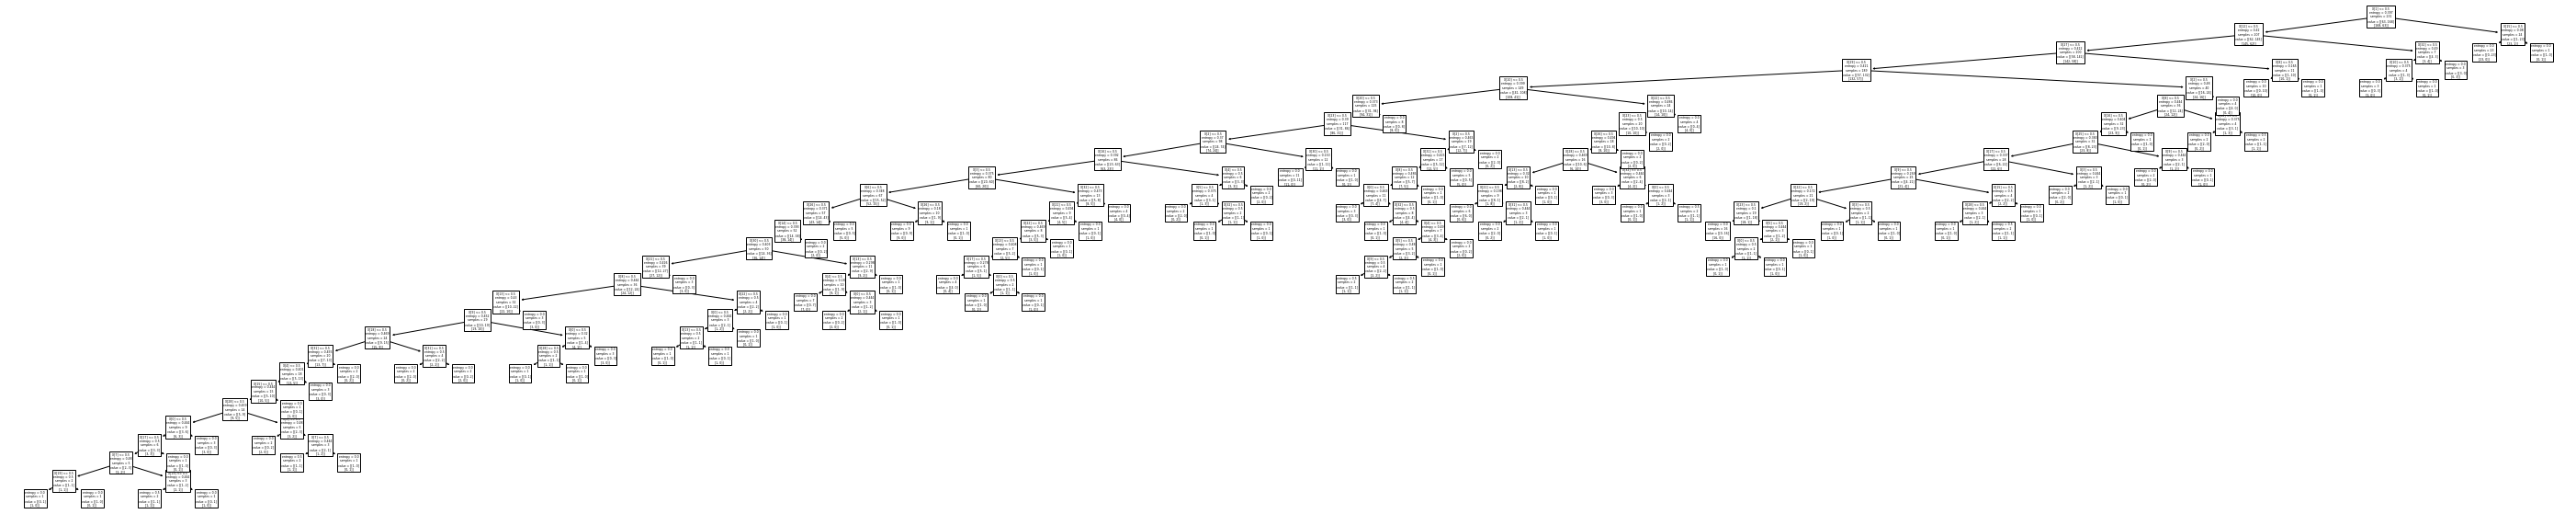

In [297]:
plt.figure(figsize=(50,10))
tree.plot_tree(decisiontree2)

In [218]:
df_new= pd.get_dummies(df_new)
X=["Gender","age","prod_cat"]
median = df_new.total_amt.mean()

In [ ]:
df_new.prod_subcat.value_counts()

In [ ]:
df_new.duplicated("customer_Id").sum()

In [ ]:
df_new["Customer_membership"]=df_new["total_amt"]


df_new["Customer_membership"]=df_new["Customer_membership"].apply(lambda x:"Yes" if x>median else "No")

In [ ]:
df_new.head()

4. You are required to write code to  find frequent itemsets using the above dataset (Question 1). In order to achieve the task, you are going to cover the following steps:
    - Importing required libraries
    - Creating a list from dataset (Question 1)
    - Convert list to dataframe with boolean values
    - Find frequently occurring itemsets using Apriori Algorithm
    - Find frequently occurring itemsets using F-P Growth
    - Mine the Association Rules


In [53]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from mlxtend.frequent_patterns import apriori, association_rules
# pd.options.display.width=200
# pd.set_option('precision',4)
import matplotlib.pyplot as plt
%matplotlib inline

n_users=df_new.customer_id.unique().shape[0]

n_items=df_new.prod_cat_code.unique().shape[0]

print(n_users)

print(n_items)

3449
4


In [57]:
df.drop_duplicates(keep='first')

,customer_id,Store_type
0,268408,Flagship store
2,268159,e-Shop
3,270829,TeleShop
4,274630,MBR
5,270324,e-Shop
6,267609,MBR
8,274592,e-Shop
9,274834,MBR
10,272795,MBR
11,269640,e-Shop


In [56]:
df.head()

,customer_id,Store_type
0,268408,Flagship store
1,268408,Flagship store
2,268159,e-Shop
3,270829,TeleShop
4,274630,MBR


In [45]:
# df_test=df_test.drop_duplicates(["customer_id","prod_cat"])

# df_test.duplicated(["customer_id","prod_cat"]).sum()

NameError: name 'df_test' is not defined

In [51]:
relationship=(df.groupby(['customer_id','prod_cat']).size().unstack().reset_index().fillna(0).set_index('customer_id')) #unstack()数据行转列


relationship.iloc[0:10,:]


prod_cat,Bags,Books,Clothing,Electronics
customer_id,,,,
266783,2.0,0.0,0.0,0.0
266785,0.0,0.0,1.0,0.0
266788,0.0,0.0,1.0,0.0
266794,1.0,0.0,1.0,0.0
266799,0.0,1.0,0.0,0.0
266804,0.0,1.0,0.0,0.0
266806,2.0,0.0,0.0,0.0
266807,1.0,0.0,1.0,0.0
266810,2.0,0.0,0.0,0.0


In [ ]:
relationship.iloc[0]

In [ ]:
frequent=apriori(relationship,min_support=0.05,use_colnames=True)

# the datasets with the 10 highest support meritcs
frequent.sort_values(by='support',ascending=False).head(10)

In [ ]:
rules=association_rules(frequent,metric='lift',min_threshold=0.8)
rules.head(10)

In [ ]:
data=DataFrame(rules)
R_result=data[(data['lift']>=1)&(data['confidence']>=0.05)&(data['antecedents']!=frozenset({'CD'}))&(data['consequents']!=frozenset({'CD'}))]
R_result.sort_values(by=['lift'],axis=0,ascending=False)

In [ ]:
ax = sns.boxplot(x="prod_subcat", y="Rate",
                 data=df_new, palette="Set3")

In [ ]:
sns.regplot(x=df.loc[0:10000,'Qty'],y=df.loc[0:10000,'total_amt'])

In [ ]:
df.groupby("customer_Id").mean().total_amt

In [ ]:
df.info()

In [ ]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.style as style
from datetime import timedelta
import datetime as dt
import time
import os

In [ ]:
df.columns

In [ ]:
ax = sns.boxplot(x="prod_subcat_code", y="Qty",
                 data=transaction, palette="Set3")

In [ ]:
ax = sns.boxplot(x="Store_type", y="",
                 data=transaction, palette="Set3")

In [ ]:
customer.head()

In [ ]:
# calculate the customer's age when they buy stuff


transactions['tran_date'] = pd.to_datetime(transactions['tran_date'], errors='coerce')


customer['DOB'] = pd.to_datetime(customer['DOB'], errors='coerce')


In [ ]:
len(df[df.total_amt<0])

In [ ]:
len(df.total_amt)

In [ ]:
df.Qty.value_counts()

In [ ]:
produce.head()

In [ ]:
produce.prod_subcat.value_counts()

In [ ]:
produce.prod_cat.value_counts()

5. You are required to write code to implement either time-series clustering or density-based clustering model using the above dataset (Question 1). If you select density-based clustering approach to achieve the task, you are going to cover the following steps:
    - Importing required libraries
    - Load the dataset (Question 1)  into a DataFrame object
    - Visualize the data, use only two of these attributes at the time
    - You may need to normalise the attribute if necessary
    - Show positive correlation between attributes if necessary
    - Construct a density-based clustering model and extract cluster labels and outliers to plot your results. 


In [312]:
clustering_data = df[["Qty","",""]]
clustering_data=clustering_data.dropna()
clustering_data= pd.get_dummies(clustering_data)

from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=5, random_state=0).fit(clustering_data)
kmeans.labels_
# add ClusterId
clustering_data["ClusterID"] = kmeans.predict(clustering_data)

print("Cluster membership")
print(clustering_data['ClusterID'].value_counts())

Cluster membership
3    6123
1    5956
2    5014
4    3040
0    2907
Name: ClusterID, dtype: int64


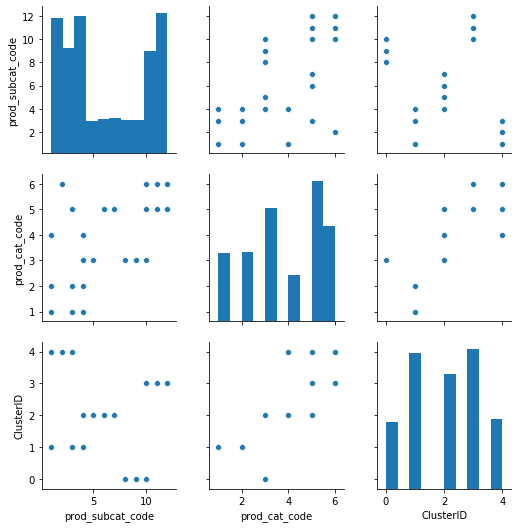

In [313]:
import seaborn as sns, numpy as np
ax = sns.pairplot(clustering_data)